In [4]:
import pandas as pd

data = {'col1' : [1,2,3,4,5],
        'col2' : [2,3,4,5,5]}
index = ['idx1', 'idx2', 'idx3', 'idx4', 'idx5']
df = pd.DataFrame(data=data, index=index)
df

,col1,col2
idx1,1,2
idx2,2,3
idx3,3,4
idx4,4,5
idx5,5,5


In [11]:
# iterrows 활용
for a,b in df.iterrows():
    print(a, '\n') # index 이름
    print(b)
    print('='*40)

idx1 

2
idx2 

3
idx3 

4
idx4 

5
idx5 

5


***2.4 데이터 정리***

In [14]:
# 예시 데이터 셋 1
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/wonbinchoi/Downloads/UNRATE.csv')

# 예시 데이터 셋 2
x = np.arange(0, 4*np.pi, 0.5)
y = np.sin(x)

plt.plot(x,y, 'o')
plt.show()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


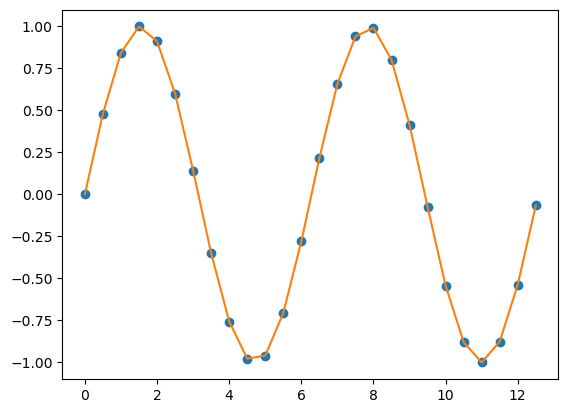

In [20]:
# 포워드 필
f_prev = interpolate.interp1d(
    x, y, kind='previous'
)
y_new_prev = f_prev(x)


plt.plot(x,y,'o',x,y_new_prev,'-')
plt.show()

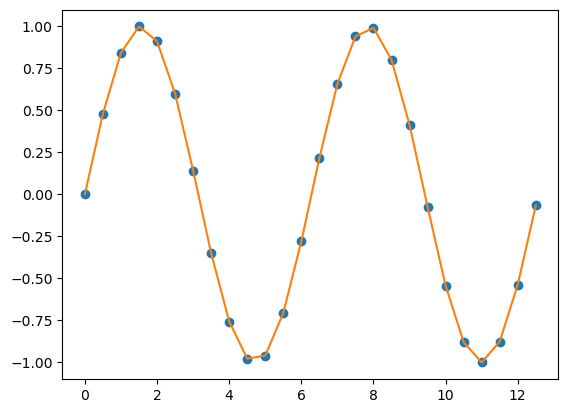

In [22]:
# 선형 보간법
f_linear = interpolate.interp1d(
    x, y, kind='linear'
)
y_new_linear = f_linear(x)


plt.plot(x,y,'o',x,y_new_prev,'-')
plt.show()

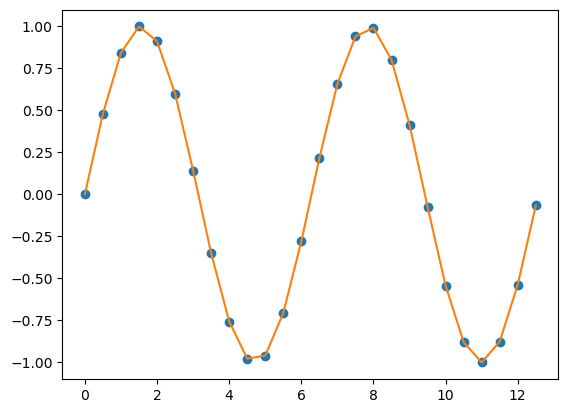

In [26]:
# 스플라인
f_quadr = interpolate.interp1d(
    x, y, kind='quadratic'
)
y_new_quadr = f_quadr(x)


plt.plot(x,y,'o',x,y_new_quadr,'-')
plt.show()

***2.4.2 업샘플링과 다운샘플링***

In [32]:
# resample 사용
# 인덱스를 시계열로 변경해서 사용
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    904 non-null    datetime64[ns]
 1   UNRATE  904 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.2 KB


In [51]:
# df = df.set_index(df['DATE']).drop(['DATE'], axis=1)
df.head()

,UNRATE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [58]:
# 다운샘플
df.resample('Y').sum()

,UNRATE
DATE,
1948-12-31,45.0
1949-12-31,72.6
1950-12-31,62.5
1951-12-31,39.4
1952-12-31,36.3
...,...
2019-12-31,44.2
2020-12-31,97.1
2021-12-31,64.4


In [63]:
# 업샘플
# 업샘플뒤 보간법 이용 .
df = df.resample('H').last().interpolate()
df.head(10)

,UNRATE
DATE,
1948-01-01 00:00:00,3.400000
1948-01-01 01:00:00,3.400538
1948-01-01 02:00:00,3.401075
1948-01-01 03:00:00,3.401613
1948-01-01 04:00:00,3.402151
1948-01-01 05:00:00,3.402688
1948-01-01 06:00:00,3.403226
1948-01-01 07:00:00,3.403763
1948-01-01 08:00:00,3.404301


***2.4.3 데이터 평활***

In [71]:
air = pd.read_csv('/Users/wonbinchoi/Downloads/AirPassengers.csv')
air_ewm = air.copy()

In [72]:
# 지수평활 ==> 장기적인 데이터에는 잘 적용되지 못함 
# why? 계절성을 따지기 때문
air_ewm['Smooth_5'] = air_ewm.ewm(alpha=.5).mean()['#Passengers']
air_ewm['Smooth_1'] = air_ewm.ewm(alpha=.9).mean()['#Passengers']
air_ewm.head(11)

/var/folders/yr/nt9qv8x55mv3g666qst4sx980000gn/T/ipykernel_46389/76145332.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  air_ewm['Smooth_5'] = air_ewm.ewm(alpha=.5).mean()['#Passengers']
/var/folders/yr/nt9qv8x55mv3g666qst4sx980000gn/T/ipykernel_46389/76145332.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  air_ewm['Smooth_1'] = air_ewm.ewm(alpha=.9).mean()['#Passengers']


,Month,#Passengers,Smooth_5,Smooth_1
0,1949-01,112,112.000000,112.000000
1,1949-02,118,116.000000,117.454545
2,1949-03,132,125.142857,130.558559
3,1949-04,129,127.200000,129.155716
4,1949-05,121,124.000000,121.815498
5,1949-06,135,129.587302,133.681562
6,1949-07,148,138.866142,146.568157
7,1949-08,148,143.450980,147.856816
8,1949-09,136,139.718200,137.185682
9,1949-10,119,129.348974,120.818568


In [78]:
# 추세를 가진 데이터와 추세 및 계절성을 모든 가진 데이터에 적용 가능한 
# 홀트의 방법
# 홀트-윈터스의 평활
air_holt = air.copy()
air_holt = air_holt.set_index(['Month'])

from statsmodels.tsa.api import Holt

fit1 = Holt(air_holt,
            initialization_method = 'estimated',
            exponential = True,
            damped_trend= True).fit()
print(fit1.summary())

                              Holt Model Results                              
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                           Holt   SSE                         162979.973
Optimized:                       True   AIC                           1022.546
Trend:                 Multiplicative   BIC                           1037.395
Seasonal:                        None   AICC                          1023.370
Seasonal Periods:                None   Date:                 Mon, 08 May 2023
Box-Cox:                        False   Time:                         23:18:04
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950801                alpha                 True
smoothing_trend           9.9038e-05                

/Users/wonbinchoi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [80]:
# 홀트-윈터스
# 계절성을 고려한

from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

# additive model for fixed seasonal variation
fit6 = HWES(air_holt, 
             seasonal_periods=12, 
             trend='add', 
             seasonal='add').fit(optimized=True, use_brute=True)
                    # or 'mul'
print(fit6.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:              #Passengers   No. Observations:                  144
Model:             ExponentialSmoothing   SSE                          21565.120
Optimized:                         True   AIC                            753.299
Trend:                         Additive   BIC                            800.816
Seasonal:                      Additive   AICC                           758.771
Seasonal Periods:                    12   Date:                 Mon, 08 May 2023
Box-Cox:                          False   Time:                         23:22:23
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2525389                alpha                 True
smoothing_trend          

/Users/wonbinchoi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


***계절성 데이터***

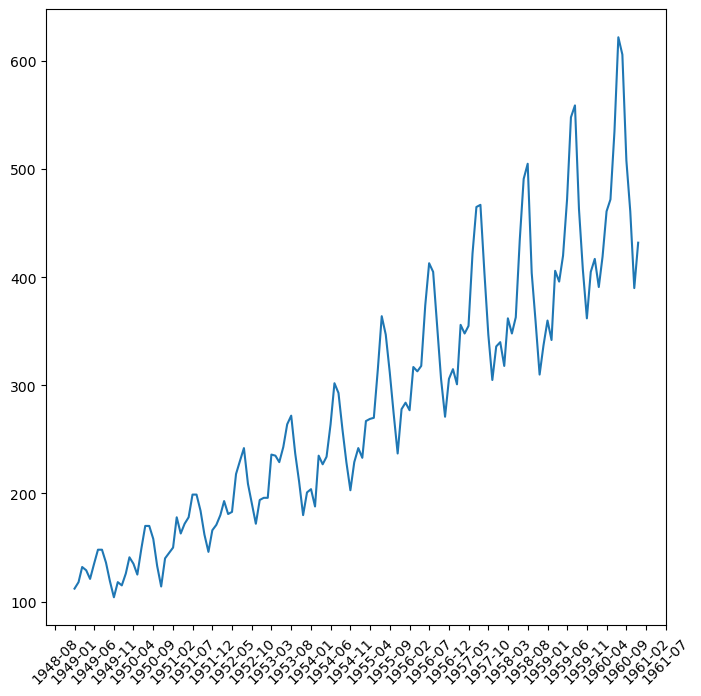

In [128]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter, YearLocator

air_plot = air.copy()
air_plot['Month'] = pd.to_datetime(air_plot['Month'])
air_plot = air_plot.set_index(['Month'])

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(air_plot)

ax.xaxis.set_major_locator(MonthLocator(interval=5)) ## 5개월마다 메인 눈금을 표시한다.
# ax.xaxis.set_major_formatter(DateFormatter('%Y/%m/%d')) ## 날짜 표시 형식
# ax.xaxis.set_minor_locator(MonthLocator(interval=1)) ## 1개월마다 서브 눈금을 표시한다.

plt.xticks(rotation=45)
plt.show() # linegraph

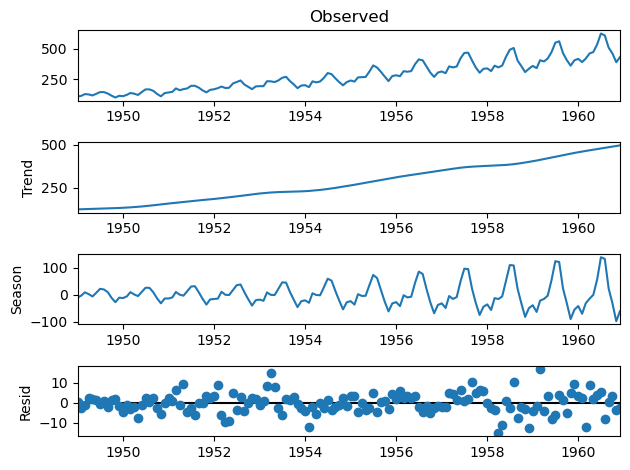

In [130]:
# STL
from statsmodels.tsa.seasonal import STL

res = STL(air_plot).fit()
res.plot()
plt.show()

***시간대***

In [138]:
# datetime 모듈 => 시간대에 적절한 시간을 반환하지만 시간대 자체에 대한 정보는 없음.
import datetime
print(datetime.datetime.utcnow())
print(datetime.datetime.now())
print(datetime.datetime.now(datetime.timezone.utc))
# 시간대를 전달하면 정확한 정보를 얻을 수 있음


2023-05-08 14:56:58.694243
2023-05-08 23:56:58.694357
2023-05-08 14:56:58.694433+00:00


In [139]:
# 시간대 작업을 위해 timezone 설정
import pytz
western = pytz.timezone('US/Pacific')
western.zone
# 현지와는 .localize

'US/Pacific'